In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('Datasets/Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# Drop month, day, year
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


In [9]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [10]:
# Independent and Dependent features
X=df.drop('FWI',axis=1)
Y=df['FWI']

In [11]:
X.head() # can also use X.iloc[:]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0,0


In [12]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [13]:
x_train.shape,x_test.shape

((183, 11), (61, 11))

In [14]:
# error arised to me that string cant be converted to float due to some string values
# so this is the way to resolve it
# this  will drop the problematic row
x_train = x_train[pd.to_numeric(x_train['Temperature'], errors='coerce').notna()]


In [15]:
# Feature Selection
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658995,-0.251013,-0.344505,0.702034,0.489970,0.383243,0.607763,0.465158,0.514061,0.251823
RH,-0.658995,1.000000,0.230683,0.239433,-0.640490,-0.398049,-0.219443,-0.698857,-0.345916,-0.444177,-0.399453
Ws,-0.251013,0.230683,1.000000,0.223349,-0.161663,-0.001829,0.082730,0.020274,0.034020,-0.076230,-0.235841
Rain,-0.344505,0.239433,0.223349,1.000000,-0.564873,-0.290046,-0.300285,-0.354479,-0.301527,-0.380854,-0.078864
FFMC,0.702034,-0.640490,-0.161663,-0.564873,1.000000,0.597020,0.503788,0.745032,0.587550,0.778048,0.248180
DMC,0.489970,-0.398049,-0.001829,-0.290046,0.597020,1.000000,0.877448,0.654349,0.981948,0.570181,0.204224
DC,0.383243,-0.219443,0.082730,-0.300285,0.503788,0.877448,1.000000,0.498627,0.941407,0.486240,-0.072253
ISI,0.607763,-0.698857,0.020274,-0.354479,0.745032,0.654349,0.498627,1.000000,0.626298,0.738717,0.279701
BUI,0.465158,-0.345916,0.034020,-0.301527,0.587550,0.981948,0.941407,0.626298,1.000000,0.571518,0.099550
Classes,0.514061,-0.444177,-0.076230,-0.380854,0.778048,0.570181,0.486240,0.738717,0.571518,1.000000,0.188459


<Axes: >

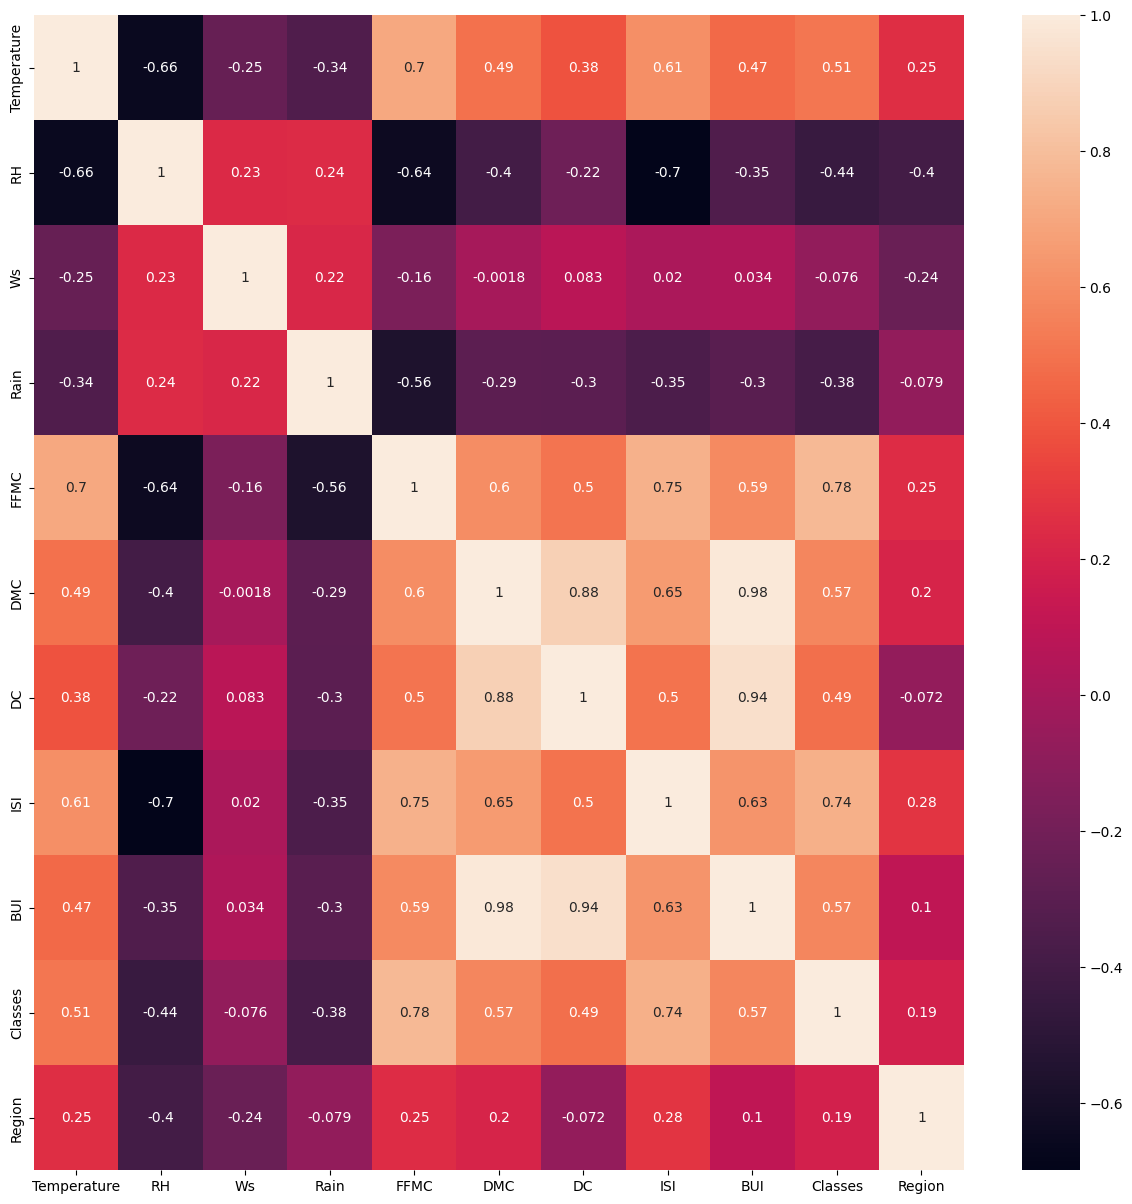

In [16]:
# Check on multicollinearility
# Multicollinearity occurs when two or more independent variables in a dataset are highly correlated.
plt.figure(figsize=(15,15))
corr = x_train.corr()
sns.heatmap(corr,annot=True)

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
correlation(x_train,0.85)

{'BUI', 'DC'}

In [19]:
# Threshold - in general setup by domain expert
corr_features=correlation(x_train,0.85)

In [20]:
# Drop these features ( correlation > 85%)
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [22]:
x_train_scaled # Standadised values

array([[-0.80879747,  0.16240659,  1.27764568, ..., -0.78605505,
        -1.14183951, -1.        ],
       [ 1.07839663, -0.45196291,  0.15791126, ...,  0.83114678,
         0.87577982,  1.        ],
       [-0.26959916,  0.64024954, -0.58857835, ..., -0.23089621,
         0.87577982,  1.        ],
       ...,
       [-1.88719411,  0.91330265,  0.53115607, ..., -1.09984047,
        -1.14183951, -1.        ],
       [ 0.26959916, -0.38369963,  0.15791126, ...,  0.46908667,
         0.87577982,  1.        ],
       [-0.53919832,  0.98156593,  2.02413529, ..., -0.88260441,
        -1.14183951, -1.        ]], shape=(182, 9))

Text(0.5, 1.0, 'X_train after Scaling')

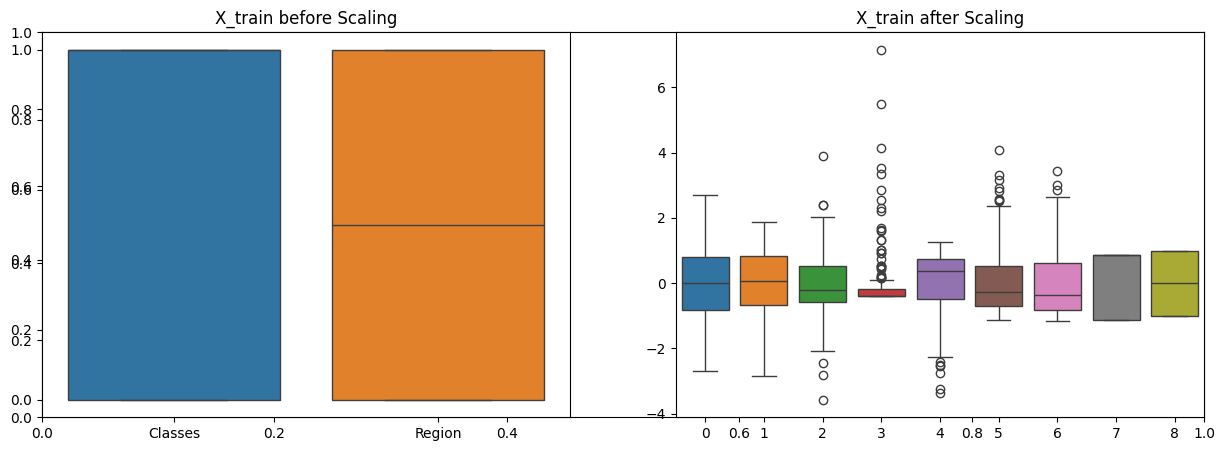

In [23]:
# Box Plot (Understanding effects of standard scaler)
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('X_train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train after Scaling')